In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import statsmodels.tsa.statespace.sarimax as sarima

In [5]:
import statsmodels.tools.eval_measures as fa

In [6]:
import arch.univariate as arch

## Background on Volatility Estimation

Historical or realized volatility estimation consists of measuring the degree of variation of asset prices returns over time. Main estimations include close to close, Parkinson, Garman-Klass, Rogers-Satchell and Garman-Klass-Yang-Zhang amoung many others:

In finance, volatility (usually denoted by σ) is the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns.

Historic volatility measures a time series of past market prices. Implied volatility looks forward in time, being derived from the market price of a market-traded derivative (in particular, an option)

Volatility as described here refers to the actual volatility, more specifically:

actual current volatility of a financial instrument for a specified period (for example 30 days or 90 days), based on historical prices over the specified period with the last observation the most recent price.
actual historical volatility which refers to the volatility of a financial instrument over a specified period but with the last observation on a date in the past
near synonymous is realized volatility, the square root of the realized variance, in turn calculated using the sum of squared returns divided by the number of observations.
actual future volatility which refers to the volatility of a financial instrument over a specified period starting at the current time and ending at a future date (normally the expiry date of an option)

Now turning to implied volatility, we have:

historical implied volatility which refers to the implied volatility observed from historical prices of the financial instrument (normally options)
current implied volatility which refers to the implied volatility observed from current prices of the financial instrument
future implied volatility which refers to the implied volatility observed from future prices of the financial instrument

However, rather than increase linearly, the volatility increases with the square-root of time as time increases, because some fluctuations are expected to cancel each other out, so the most likely deviation after twice the time will not be twice the distance from zero.

Investors care about volatility for at least eight reasons:[citation needed]

The wider the swings in an investment's price, the harder emotionally it is to not worry;
Price volatility of a trading instrument can define position sizing in a portfolio;
When certain cash flows from selling a security are needed at a specific future date, higher volatility means a greater chance of a shortfall;
Higher volatility of returns while saving for retirement results in a wider distribution of possible final portfolio values;
Higher volatility of return when retired gives withdrawals a larger permanent impact on the portfolio's value;
Price volatility presents opportunities to buy assets cheaply and sell when overpriced;
Portfolio volatility has a negative impact on the compound annual growth rate (CAGR) of that portfolio
Volatility affects pricing of options, being a parameter of the Black–Scholes model.
In today's markets, it is also possible to trade volatility directly, through the use of derivative securities such as options and variance swaps. See Volatility arbitrage.

Volatility does not measure the direction of price changes, merely their dispersion. This is because when calculating standard deviation (or variance), all differences are squared, so that negative and positive differences are combined into one quantity. Two instruments with different volatilities may have the same expected return, but the instrument with higher volatility will have larger swings in values over a given period of time.

Although the Black-Scholes equation assumes predictable constant volatility, this is not observed in real markets, and amongst the models are Emanuel Derman and Iraj Kani's[5] and Bruno Dupire's local volatility, Poisson process where volatility jumps to new levels with a predictable frequency, and the increasingly popular Heston model of stochastic volatility.[6]

Volatility smiles are implied volatility patterns that arise in pricing financial options. It is a parameter (implied volatility) that is needed to be modified for the Black–Scholes formula to fit market prices.

In particular for a given expiration, options whose strike price differs substantially from the underlying asset's price command higher prices (and thus implied volatilities) than what is suggested by standard option pricing models.

A related concept is that of term structure of volatility, which describes how (implied) volatility differs for related options with different maturities. An implied volatility surface is a 3-D plot that plots volatility smile and term structure of volatility in a consolidated three-dimensional surface for all options on a given underlying asset.

KEY TAKEAWAYS
Implied, or projected, volatility is a forward-looking metric used by options traders to calculate probability.
Implied volatility, as its name suggests, uses supply and demand, and represents the expected fluctuations of an underlying stock or index over a specific time frame.
With historical volatility, traders use past trading ranges of underlying securities and indexes to calculate price changes.
Calculations for historical volatility are generally based on the change from one closing price to the next. 


In an options trade, both sides of the transaction make a bet on the volatility of the underlying security. Even though there are several ways to measure volatility, options traders generally work with two metrics: implied volatility and historical volatility.

Implied volatility accounts for expectations for future volatility, which are expressed in options premiums, while historical volatility measures past trading ranges of underlying securities and indexes.

Implied Volatility
Implied volatility, also known as projected volatility, is one of the most important metrics for options traders. As the name suggests, it allows them to make a determination of just how volatile the market will be going forward. This concept also gives traders a way to calculate probability. One important point to note is that it shouldn't be considered science, so it doesn't provide a forecast of how the market will move in the future.

Unlike historical volatility, implied volatility comes from the price of an option and represents its volatility in the future. Because it is implied, traders can't use past performance as an indicator of future performance. Instead, they have to estimate the potential of the option in the market.

### Close-To-Close Historical Volatility Calculation – Volatility Analysis In Python
https://seekingalpha.com/instablog/10632871-rvarb/5441209-close-to-close-historical-volatility-calculation-volatility-analysis-in-python

http://tech.harbourfronts.com/close-close-historical-volatility-calculation-volatility-analysis-python/


Also referred to as statistical volatility, historical volatility gauges the fluctuations of underlying securities by measuring price changes over predetermined periods of time. It is the less prevalent metric compared to implied volatility because it isn’t forward-looking.

There are various types of historical volatilities such as close to close, Parkinson, Garman-KIass, Yang-Zhang, etc. In this post, we will discuss the close-to-close historical volatility.

The close-to-close historical volatility (CCHV) is calculated as follows,

CCHV = SQRT(1/N*SUM(i=1,N):x^2)

where xi are the logarithmic returns calculated based on the stock’s closing prices, and N is the sample size. In this example, N=22, the average number of trading days in a month.

It’s observed that the volatility is a mean-reverting process. The CCHV has the following characteristics [1]

Advantages

It has well-understood sampling properties
It is easy to correct bias
It is easy to convert to a form involving typical daily moves
Disadvantages

It is a very inefficient use of data and converges very slowly

### Close to Close Estimation

In [8]:
hdata = pd.read_csv("./Volatility-Trading-Analysis-Data.txt", index_col='Date', parse_dates=True)

In [9]:
hvcc = np.sqrt(252) * pd.DataFrame.rolling(np.log(hdata.loc[:,'SPX.Close'] / hdata.loc[:, 'SPX.Close'].shift(1)), window=20).std()

In [ ]:
# sqrt(N) * rollSD(log(CL/lag(C1,1))), n-1)

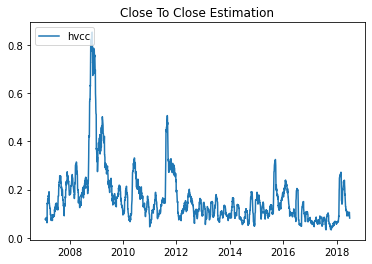

In [11]:
plt.plot(hvcc, label='hvcc')
plt.legend(loc='upper left')
plt.title('Close To Close Estimation')
plt.show();

In [ ]:
## Parkson Estimation

Parkinson estimation consists of using logarithmic returns of intra-day high and low asset prices for its calculation. It doesn't take into consideratoin drifts or overnight jumps.

Michael Parkinson "The Extreme Value Method for Estimating the Variance of the Rate of Return"

A disadvantage of using the CCHV is that it does not take into account the information about intraday prices. The Parkinson volatility extends the CCHV by incorporating the stock’s daily high and low prices. It is calculated as follows,

where hi denotes the daily high price, and li is the daily low price.

We implemented the above equation in Python. We downloaded SPY data from Yahoo finance and calculated the Parkinson volatility using the Python program. The picture below shows the Parkinson historical volatility of SPY from March 2015 to March 2020.

Advantages

Using daily ranges seems sensible and provides completely separate information from using time-based  sampling such as closing prices
Disadvantages

It is really only appropriate for measuring the volatility of a GBM process. It cannot handle trends and jumps
It systematically underestimates volatility.


In [ ]:
# sqrt(N(4(n(log(2)) * rollSum(log(Hi/Lo)^2, n))))

In [16]:
hvp = np.sqrt(252 / (4 * 21 * np.log(2)) * pd.DataFrame.rolling(np.log(hdata.loc[:,'SPX.High'] / hdata.loc[:, 'SPX.Low']) ** 2, window=21).sum())

In [17]:
hvpe = hvcc ** 2 / hvp ** 2

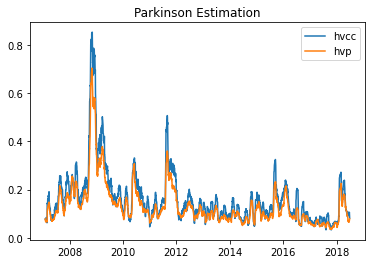

In [18]:
plt.plot(hvcc, label='hvcc')
plt.plot(hvp, label='hvp')
plt.legend(loc='upper right')
plt.title('Parkinson Estimation')
plt.show();

### Garman-Klass Estimation

GKE consist of using logarithmic returns of intra-day open, high, low, and close asset prices for its calcuation. It doesn't take into account drifts or overnight gaps.

Volatility Analysis in Python Garman-Klass 
where hi denotes the daily high price, li is the daily low price, ci is the daily closing price and oi is the daily opening price.



In [12]:
# sqrt(N/n * rollSum(0.5 * log(Hi/Lo)^2 - (2*log(2)-1) * log(Cl/Op)^2, n))

In [13]:
hvgk = np.sqrt(252 / 21 * pd.DataFrame.rolling(0.5 * np.log(hdata.loc[:,'SPX.High'] / hdata.loc[:,'SPX.Low']) ** 2 - (2 * np.log(2) - 1) * np.log(hdata.loc[:,'SPX.Close'] / hdata.loc[:, 'SPX.Open']) ** 2, window=21).sum())

In [14]:
hvgke = hvcc ** 2 / hvgk ** 2

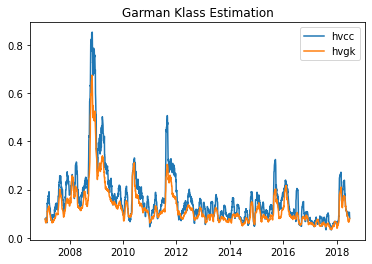

In [15]:
plt.plot(hvcc,label='hvcc')
plt.plot(hvgk, label='hvgk')
plt.legend(loc='upper right')
plt.title('Garman Klass Estimation')
plt.show();